In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/heart_attack_dataset.csv')

## 1. Mức cholesterol và huyết áp ảnh hưởng như thế nào đến nguy cơ mắc bệnh tim theo từng nhóm tuổi? Có mối quan hệ tương quan nào giữa cholesterol và huyết áp trong việc làm tăng nguy cơ mắc bệnh tim không? 

In [3]:
# Chia cholesterol và huyết áp thành các bins
cholesterol_bins = [100, 150, 200, 250, 300]
blood_pressure_bins = [80, 100, 120, 140, 160, 180]
age_bins = [30, 40, 50, 60, 70, 80, 90]

df['Cholesterol_Bin'] = pd.cut(df['Cholesterol'], bins=cholesterol_bins, labels=['100-149', '150-199', '200-249', '250-299'])
df['BloodPressure_Bin'] = pd.cut(df['BloodPressure'], bins=blood_pressure_bins, labels=['80-99', '100-119', '120-139', '140-159', '160-179'])
df['Age_Bin'] = pd.cut(df['Age'], bins=age_bins, labels=['30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

### 1.1. Tỷ lệ mắc bệnh tim theo mức cholesterol trong từng nhóm tuổi

C:\Users\KIJEN28\AppData\Local\Temp\ipykernel_32140\223554871.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_attack_rate_chol = df.groupby(['Age_Bin', 'Cholesterol_Bin'])['Outcome'].apply(lambda x: (x == 'Heart Attack').mean()).reset_index()


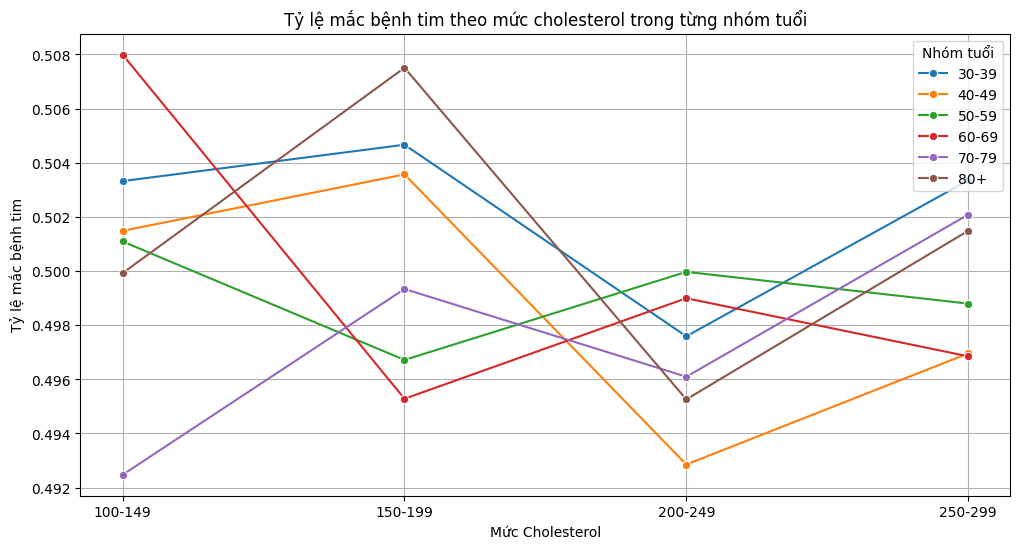

In [4]:
heart_attack_rate_chol = df.groupby(['Age_Bin', 'Cholesterol_Bin'])['Outcome'].apply(lambda x: (x == 'Heart Attack').mean()).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=heart_attack_rate_chol, x='Cholesterol_Bin', y='Outcome', hue='Age_Bin', marker='o')
plt.title('Tỷ lệ mắc bệnh tim theo mức cholesterol trong từng nhóm tuổi')
plt.xlabel('Mức Cholesterol')
plt.ylabel('Tỷ lệ mắc bệnh tim')
plt.legend(title='Nhóm tuổi', loc='upper right')
plt.grid(True)
plt.savefig('heart_attack_rate_chol.svg', format='svg')
plt.show()

### 1.2. Tỷ lệ mắc bệnh tim theo mức huyết áp trong từng nhóm tuổi

C:\Users\KIJEN28\AppData\Local\Temp\ipykernel_32140\13260625.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_attack_rate_bp = df.groupby(['Age_Bin', 'BloodPressure_Bin'])['Outcome'].apply(lambda x: (x == 'Heart Attack').mean()).reset_index()


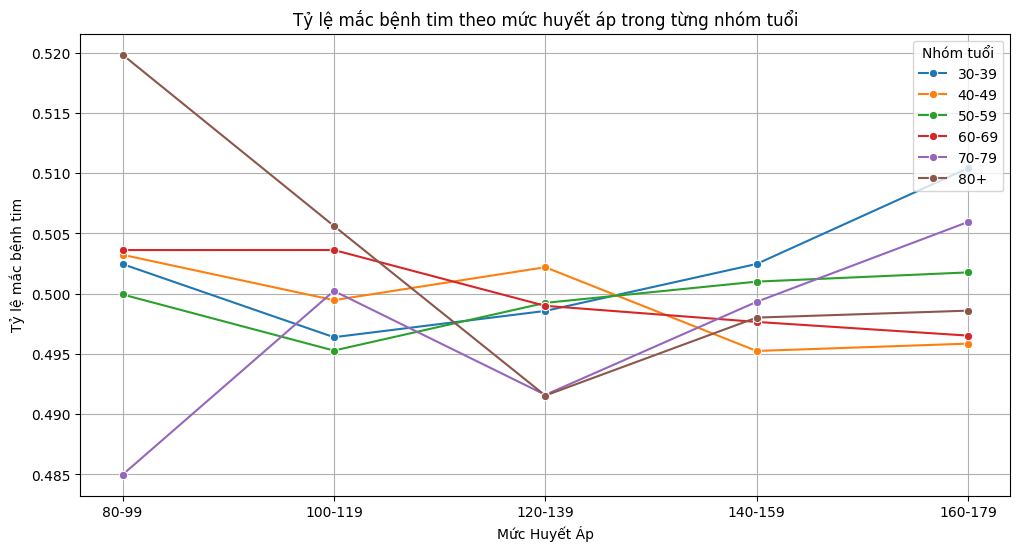

In [5]:
heart_attack_rate_bp = df.groupby(['Age_Bin', 'BloodPressure_Bin'])['Outcome'].apply(lambda x: (x == 'Heart Attack').mean()).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=heart_attack_rate_bp, x='BloodPressure_Bin', y='Outcome', hue='Age_Bin', marker='o')
plt.title('Tỷ lệ mắc bệnh tim theo mức huyết áp trong từng nhóm tuổi')
plt.xlabel('Mức Huyết Áp')
plt.ylabel('Tỷ lệ mắc bệnh tim')
plt.legend(title='Nhóm tuổi', loc='upper right')
plt.grid(True)
plt.savefig('heart_attack_rate_bp.svg', format='svg')
plt.show()

### 1.3. Mối quan hệ giữa cholesterol và huyết áp theo tình trạng mắc bệnh tim

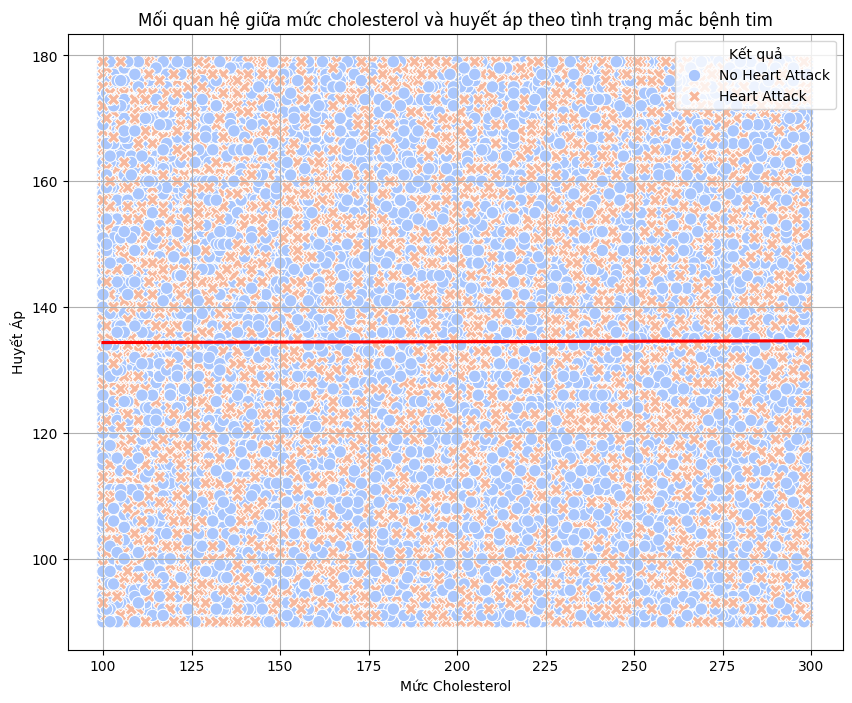

In [6]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Cholesterol', y='BloodPressure', hue='Outcome', style='Outcome', palette='coolwarm', s=80)
sns.regplot(data=df, x='Cholesterol', y='BloodPressure', scatter=False, color='red')  # Đường hồi quy
plt.title('Mối quan hệ giữa mức cholesterol và huyết áp theo tình trạng mắc bệnh tim')
plt.xlabel('Mức Cholesterol')
plt.ylabel('Huyết Áp')
plt.legend(title='Kết quả', loc='upper right')
plt.grid(True)
plt.savefig('cholesterol_bp_outcome.svg', format='svg')
plt.show()

## 2. Liệu loại đau ngực, kết quả điện tâm đồ và tình trạng tăng huyết áp có thể giúp xác định các nhóm bệnh nhân có nguy cơ cao mắc bệnh tim? Mối quan hệ giữa các yếu tố này có thể cung cấp thông tin gì về các yếu tố nguy cơ tiềm ẩn? 

### 2.1. Mối quan hệ giữa loại đau ngực và kết quả điện tâm đồ

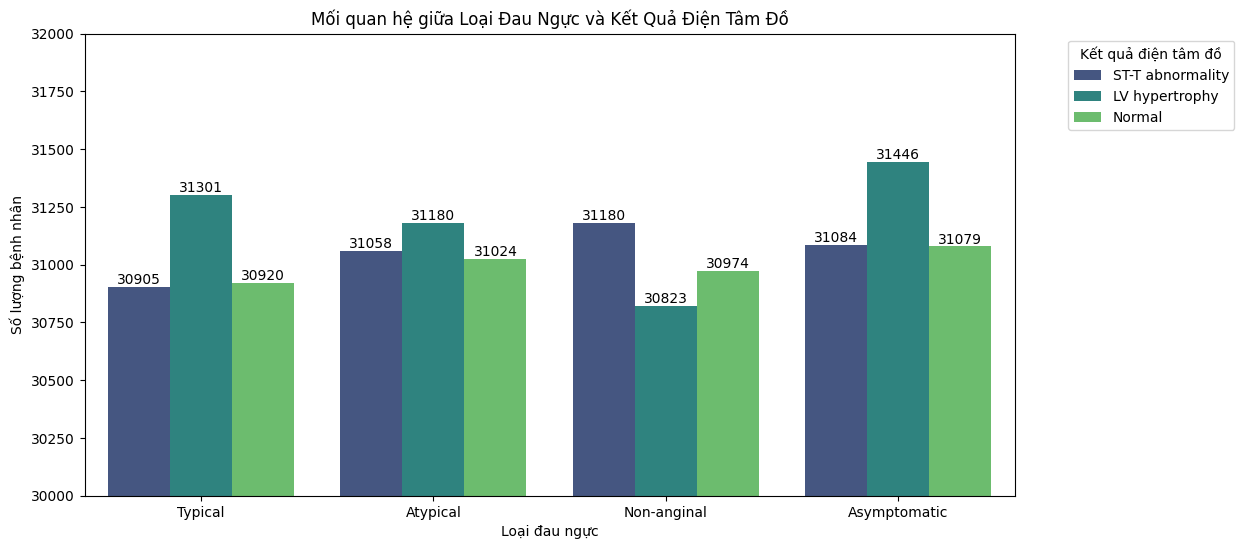

In [7]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df, 
    x='ChestPainType', 
    hue='ECGResults', 
    palette='viridis',
    dodge=True
)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', color='black', 
        xytext=(0, 5), textcoords='offset points'
    )
    
plt.title('Mối quan hệ giữa Loại Đau Ngực và Kết Quả Điện Tâm Đồ')
plt.ylabel('Số lượng bệnh nhân')
plt.xlabel('Loại đau ngực')
plt.legend(title='Kết quả điện tâm đồ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(30000, 32000)
plt.savefig('chest_pain_ecg.svg', format='svg')
plt.show()

### 2.2. Mối quan hệ giữa Loại Đau Ngực, Kết Quả Điện Tâm Đồ và Tăng Huyết Áp

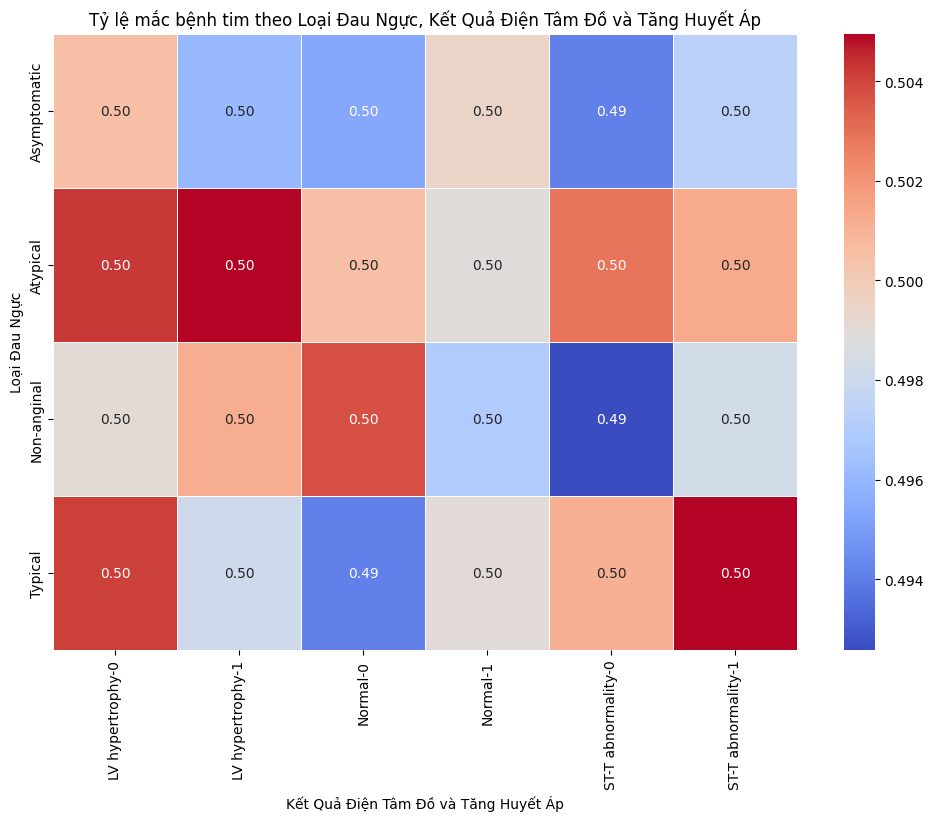

In [8]:
df['Outcome'] = df['Outcome'].map({'No Heart Attack': 0, 'Heart Attack': 1})

heatmap_data = df.pivot_table(
    index='ChestPainType', 
    columns=['ECGResults', 'Hypertension'], 
    values='Outcome', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5
)
plt.ylabel('Loại Đau Ngực')
plt.xlabel('Kết Quả Điện Tâm Đồ và Tăng Huyết Áp')
plt.title('Tỷ lệ mắc bệnh tim theo Loại Đau Ngực, Kết Quả Điện Tâm Đồ và Tăng Huyết Áp')
plt.savefig('chest_pain_ecg_hypertension.svg', format='svg')
plt.show()